In [7]:
install.packages("performance")
library(DHARMa)
library(lindia)
library(tidyverse)
library(caret)
library(leaps)
library(MASS)
library(modEvA)
library(dplyr)
library(broom)
library(ggpubr) 
library(rstatix)
library(WRS2) #robust ancova

library(lme4) #random effect
library(lmerTest) #like lmer but with p-value
library(robustlmm) #robust (with weight) linear mixed effect models

library(rstanarm) #r2 in mixed effect models
library(performance) #r2 in mixed effect models

Warning message:
"package 'performance' is in use and will not be installed"


In [8]:
R.version

               _                           
platform       x86_64-w64-mingw32          
arch           x86_64                      
os             mingw32                     
system         x86_64, mingw32             
status                                     
major          4                           
minor          0.3                         
year           2020                        
month          10                          
day            10                          
svn rev        79318                       
language       R                           
version.string R version 4.0.3 (2020-10-10)
nickname       Bunny-Wunnies Freak Out     

install.packages("WRS", repos="http://R-Forge.R-project.org", type="source")
library(WRS)

## Download data

In [9]:
path_ = 'G:/VPHI/Welfare/2- Research Projects/OFHE2.OriginsE2/DataOutput/TrackingSystem/CleaningAnalysis_/Cleaning'
name = 'reliability_transition'
df = read.csv(file.path(path_, paste(name,'.csv', sep='')), header = TRUE, sep = ";")
df$PenID = as.factor(df$PenID)
df$BatchID = as.factor(df$BatchID)
df$variable = as.factor(df$variable)
#compute diff
df$absolute_difference_VIDBIN = abs(df$Observed_Zone-df$Binning_Zone) #add one then take the log
df$absolute_difference_VIDML = abs(df$Observed_Zone-df$Model_Zone) #add one then take the log
df$absolute_difference_VIDTD = abs(df$Observed_Zone-df$ThresholdOnDuration_Zone) #add one then take the log
df$absolute_difference_VIDuproc = abs(df$Observed_Zone-df$Trackingsystem_Zone) #add one then take the log
print(dim(df))
summary(df)
head(df,3)

[1] 210  12


    BatchID      variable  ThresholdOnDuration_Zone  Binning_Zone  
 ID1    :  5   1_Zone:42   Min.   :0.00             Min.   : 0.00  
 ID10   :  5   2_Zone:42   1st Qu.:0.00             1st Qu.: 0.00  
 ID11   :  5   3_Zone:42   Median :1.00             Median : 1.00  
 ID12   :  5   4_Zone:42   Mean   :1.71             Mean   : 1.81  
 ID13   :  5   5_Zone:42   3rd Qu.:3.00             3rd Qu.: 3.00  
 ID14   :  5               Max.   :9.00             Max.   :10.00  
 (Other):180                                                       
 Observed_Zone      Model_Zone     Trackingsystem_Zone     PenID   
 Min.   : 0.000   Min.   : 0.000   Min.   : 0.000      pen10  :30  
 1st Qu.: 0.000   1st Qu.: 0.000   1st Qu.: 0.000      pen3   :30  
 Median : 1.000   Median : 1.000   Median : 1.000      pen5   :30  
 Mean   : 1.848   Mean   : 1.838   Mean   : 2.348      pen8   :30  
 3rd Qu.: 3.000   3rd Qu.: 3.000   3rd Qu.: 3.750      pen11  :25  
 Max.   :10.000   Max.   :10.000   Max.   :18.00

,BatchID,variable,ThresholdOnDuration_Zone,Binning_Zone,Observed_Zone,Model_Zone,Trackingsystem_Zone,PenID,absolute_difference_VIDBIN,absolute_difference_VIDML,absolute_difference_VIDTD,absolute_difference_VIDuproc
,<fct>,<fct>,<int>,<int>,<int>,<int>,<int>,<fct>,<int>,<int>,<int>,<int>
1,ID1,2_Zone,3,3,3,3,5,pen3,0,0,0,2
2,ID10,2_Zone,3,3,3,3,3,pen9,0,0,0,0
3,ID11,2_Zone,2,3,2,2,4,pen9,1,0,0,2


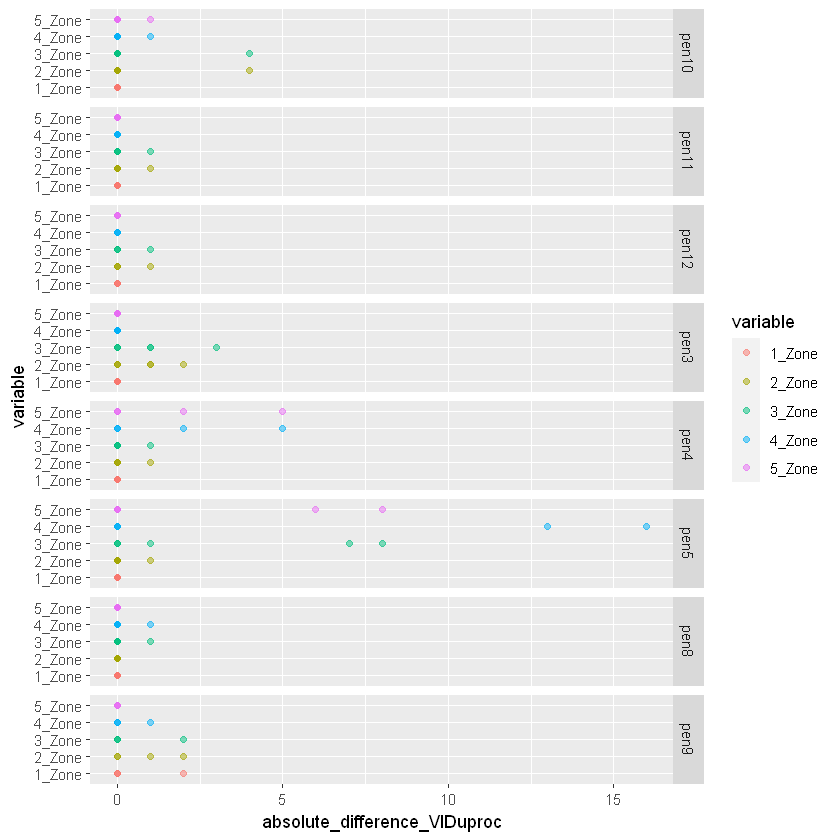

In [27]:
ggplot(df, aes(y = variable, x = absolute_difference_VIDuproc, col=variable)) + geom_point(alpha = 1/2) + facet_grid(PenID ~ .)
ggsave(path = path_, width = 9, height = 6, device='tiff', filename=paste('absolute_difference_VIDuproc_testingdata.jpg', sep=''), dpi=700)

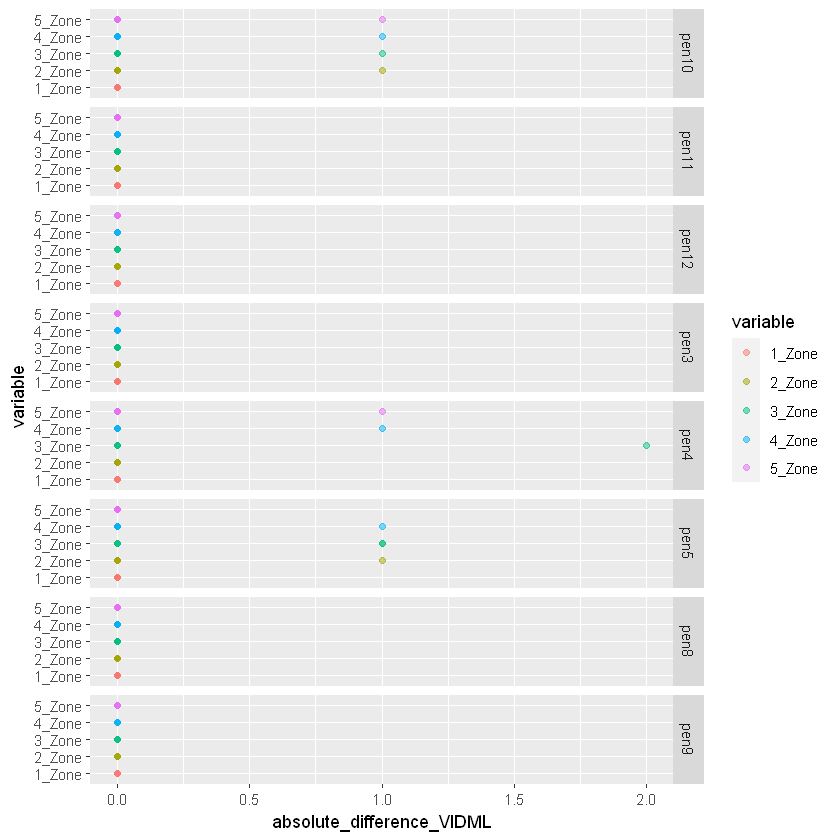

In [28]:
ggplot(df, aes(y = variable, x = absolute_difference_VIDML, col=variable)) + geom_point(alpha = 1/2) + facet_grid(PenID ~ .)
ggsave(path = path_, width = 9, height = 6, device='tiff', filename=paste('absolute_difference_VIDML_testingdata.jpg', sep=''), dpi=700)